In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split


In [2]:
#set seed
random.seed(42)

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images.astype('float32') / 255.0, test_images.astype('float32') / 255.0
train_labels, test_labels = to_categorical(train_labels, 10), to_categorical(test_labels, 10)

In [4]:
# Build the model
model = Sequential()

l2_weight = 0.0001

#First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_weight), input_shape=train_images.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(l2_weight)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

#Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model.add(Conv2D(64, (3, 3), kernel_regularizer=l2(l2_weight)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

#Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_weight)))
model.add(Conv2D(128, (3, 3), kernel_regularizer=l2(l2_weight)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))


#Flattening and dense layers
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_weight)))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax", kernel_regularizer=l2(l2_weight)))

In [5]:
# Early stopping to prevent overfitting
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_images, train_labels,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[es]
)

# Save the model
model.save('image_classification.h5')

Epoch 1/50
1250/1250 [==============================] - 113s 89ms/step - loss: 1.6680 - accuracy: 0.4132 - val_loss: 1.3555 - val_accuracy: 0.5470
Epoch 2/50
1250/1250 [==============================] - 115s 92ms/step - loss: 1.2903 - accuracy: 0.5728 - val_loss: 1.1612 - val_accuracy: 0.6231
Epoch 3/50
1250/1250 [==============================] - 116s 93ms/step - loss: 1.1579 - accuracy: 0.6332 - val_loss: 1.0642 - val_accuracy: 0.6692
Epoch 4/50
1250/1250 [==============================] - 125s 100ms/step - loss: 1.0668 - accuracy: 0.6691 - val_loss: 0.9812 - val_accuracy: 0.7051
Epoch 5/50
1250/1250 [==============================] - 139s 111ms/step - loss: 0.9965 - accuracy: 0.7025 - val_loss: 0.9404 - val_accuracy: 0.7259
Epoch 6/50
1250/1250 [==============================] - 114s 91ms/step - loss: 0.9460 - accuracy: 0.7245 - val_loss: 0.9527 - val_accuracy: 0.7233
Epoch 7/50
1250/1250 [==============================] - 114s 91ms/step - loss: 0.9141 - accuracy: 0.7401 - val_loss:

c:\Users\s1723280\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
#load model
from tensorflow.keras.models import load_model
model = load_model('image_classification.h5')

#test accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 9s - loss: 0.9700 - accuracy: 0.7680 - 9s/epoch - 27ms/step
0.7680000066757202


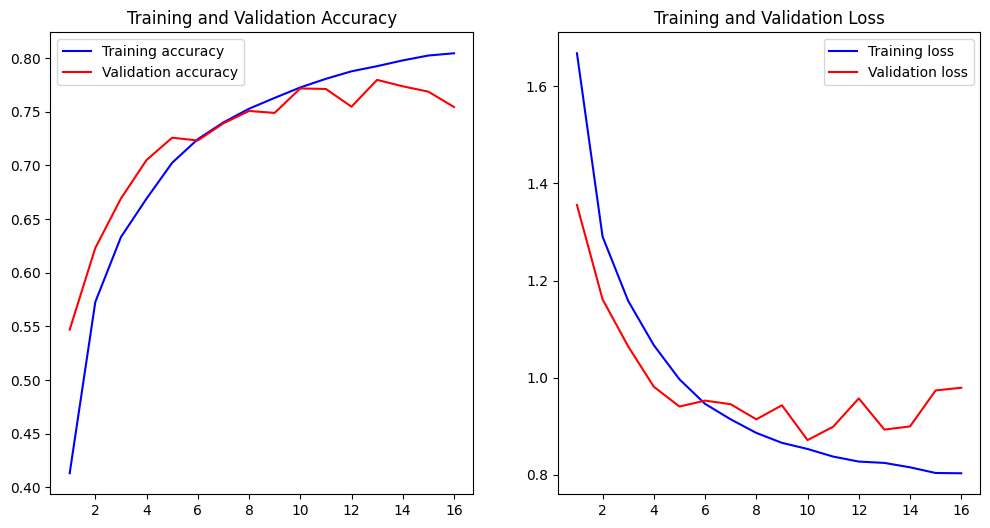

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

313/313 [==============================] - 9s 27ms/step


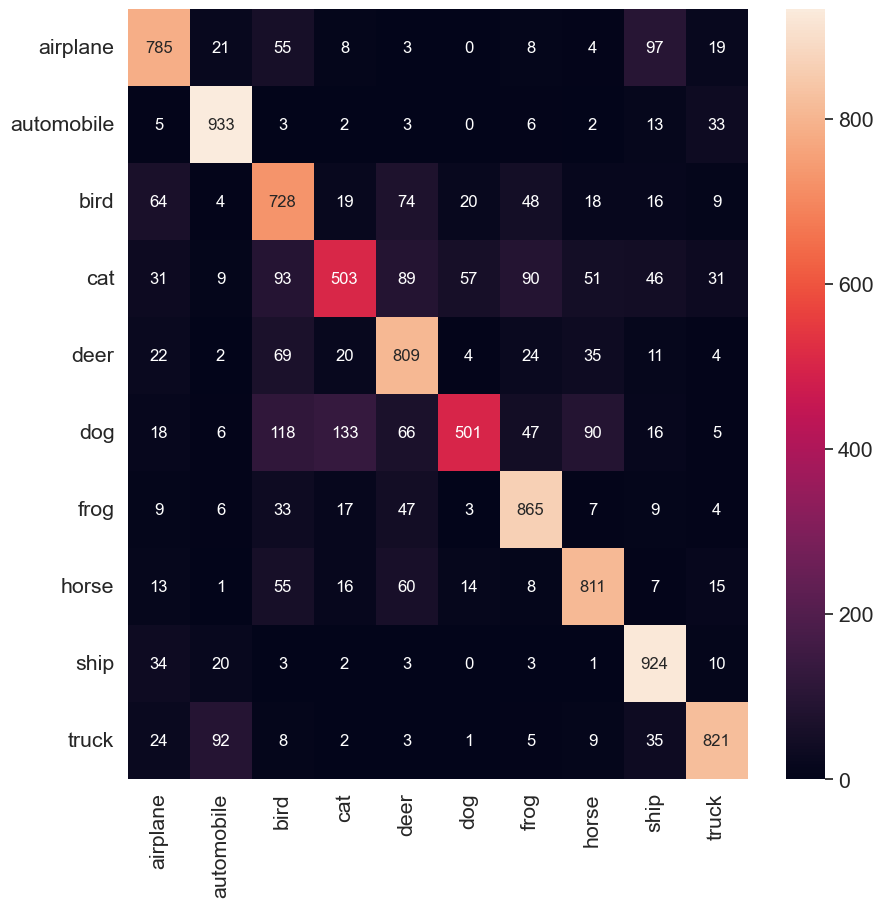

In [8]:
#plot a confusion matrix
y_pred = model.predict(test_images)
y_pred_classes = np.argmax(y_pred, axis=1)
categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_pred_labels = [categories[i] for i in y_pred_classes]
y_true = np.argmax(test_labels, axis=1)
y_true_labels = [categories[i] for i in y_true]
cm = confusion_matrix(y_true_labels, y_pred_labels)
cm = pd.DataFrame(cm, index = categories, columns = categories)
plt.figure(figsize=(10, 10))
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 12}, fmt='g') # font size
plt.show()